In [1]:
import csv
import cv2
import numpy as np

## Load data from 'csv' file
lines =[]
with open('./data_sample/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader :
        lines.append(line)

In [2]:
lines[0]

['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']

In [3]:
lines[1]

['IMG/center_2016_12_01_13_30_48_287.jpg',
 ' IMG/left_2016_12_01_13_30_48_287.jpg',
 ' IMG/right_2016_12_01_13_30_48_287.jpg',
 '0',
 '0',
 '0',
 '22.14829']

In [4]:
lines[1][0]

'IMG/center_2016_12_01_13_30_48_287.jpg'

In [5]:
lines[1][0].split('/')

['IMG', 'center_2016_12_01_13_30_48_287.jpg']

In [6]:
## split data X_train : images , y_train : steering value at that moment
images =[]
measurements = []
data_dir = './data_sample/IMG/'
for line in lines[1:] :
# for line in lines[1:6] :
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = data_dir + filename
#     print(current_path)
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])
#     print(measurement)
    measurements.append(measurement)
    
X_train = np.array(images)
y_train = np.array(measurements)

In [7]:
X_train.shape

(8591,)

In [8]:
X_train[0].shape

(160, 320, 3)

In [9]:
y_train.shape

(8591,)

In [10]:
y_train[0:100]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.0617599 ,  0.05219137,  0.05219137,  0.3679529 ,
        0.5784606 ,  0.5784606 ,  0.1670138 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.08

In [148]:
import matplotlib.pyplot as plt
import csv
import cv2
import numpy as np
import matplotlib.image as mpimg


%matplotlib inline

angle = -1     augmented_angle = -1


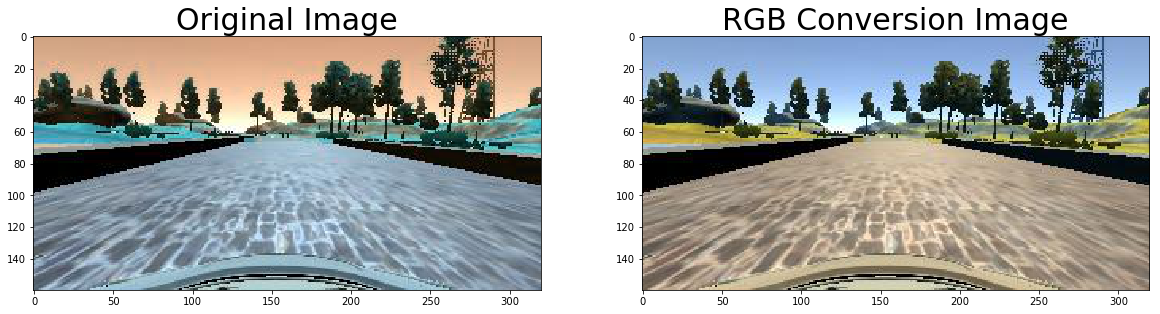

In [99]:
### random BGR to RGB Convert

def cvt_BGR2RGB(image , angle):
    
    import random
    
    prob_thresh = 0
    prob = random.random()
    
    if prob > prob_thresh :
        return cv2.cvtColor(image,cv2.COLOR_BGR2RGB ) , angle
    else :
        return image , angle


## test
test_image = X_train[0]
steer = -1
augmented_image , augmented_angle = cvt_BGR2RGB(test_image , angle)

# Visualize undistortion
print('angle = '+str(angle)+"     augmented_angle = "+str(augmented_angle))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(augmented_image)
ax2.set_title('RGB Conversion Image', fontsize=30)

In [ ]:
## test
test_image = X_train[0]
angle = -1
augmented_image ,  = cvt_BGR2RGB(test_image , angle)
augmented_angle = angle

# Visualize undistortion
print('angle = '+str(angle)+"     augmented_angle = "+str(augmented_angle))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(augmented_image)
ax2.set_title('RGB Conversion Image', fontsize=30)

angle = -1     augmented_angle = 1.0


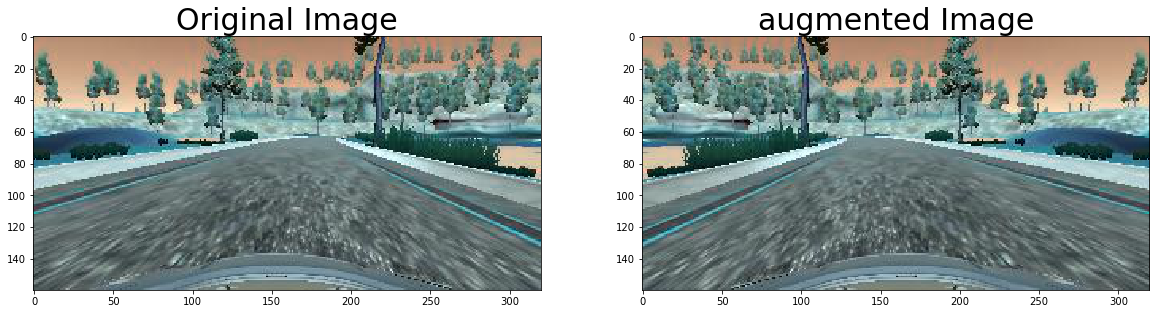

In [85]:
### Flip vertical

def random_flip_vertical(image , angle):
    
    import random
    
    prob_thresh = 0.5
    prob = random.random()
    
    if prob > prob_thresh :
        aug_image = cv2.flip(image,1)
        aug_angle = angle*(-1.0)
        return aug_image, aug_angle       
    else :
        return image , angle

## test
test_image = X_train[1000]
steer = -1
augmented_image , augmented_angle = random_flip_vertical(test_image , angle)

# Visualize undistortion
print('angle = '+str(angle)+"     augmented_angle = "+str(augmented_angle))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(augmented_image)
ax2.set_title('augmented Image', fontsize=30)

angle = -1     augmented_angle = -1.0


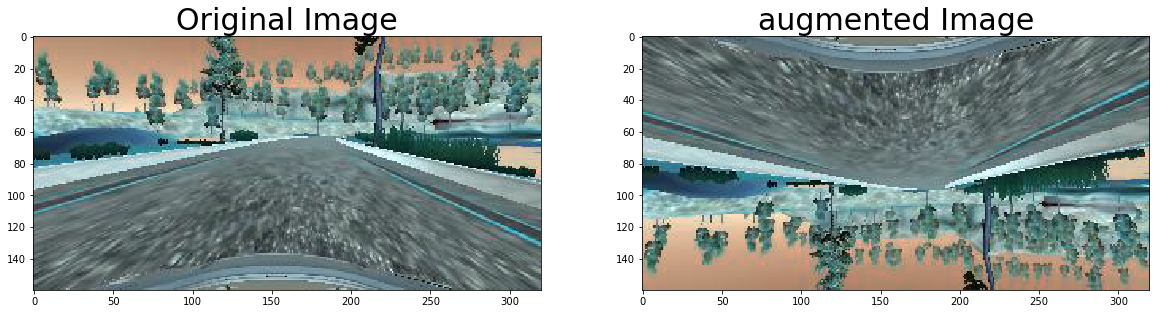

In [117]:
### Flip Horizontal

def random_flip_horizontal(image , angle):
    
    import random
    
    prob_thresh = 0.5
    prob = random.random()
    
    if prob > prob_thresh :
        aug_image = cv2.flip(image,0)
        aug_angle = angle*(1.0)
        return aug_image, aug_angle       
    else :
        return image , angle

## test
test_image = X_train[1000]
steer = -1
augmented_image , augmented_angle = random_flip_horizontal(test_image , angle)

# Visualize undistortion
print('angle = '+str(angle)+"     augmented_angle = "+str(augmented_angle))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(augmented_image)
ax2.set_title('augmented Image', fontsize=30)

angle = -1     augmented_angle = 1.0


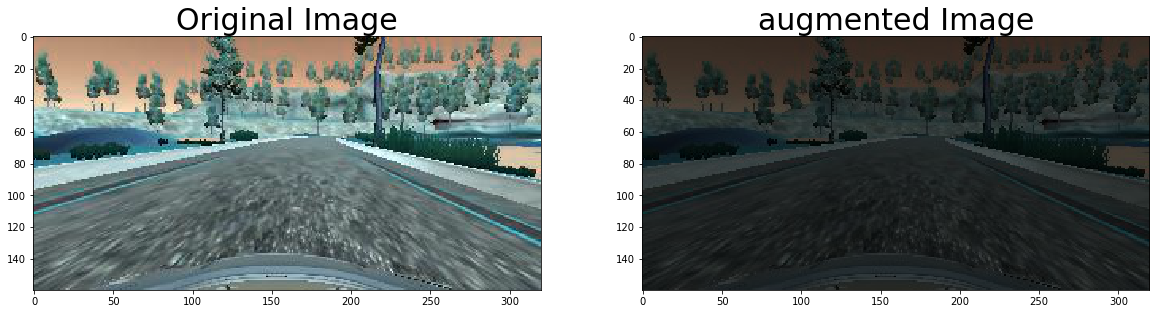

In [98]:
def random_brightness(image):
    import random
    
    prob_thresh = 0
    prob = random.random() 
    
    if prob > prob_thresh :
        #Convert 2 HSV colorspace from RGB colorspace
        hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

        #Generate new random brightness
        rand = random.uniform(0.3,1.0)
        hsv[:,:,2] = rand*hsv[:,:,2]

        #Convert back to RGB colorspace
        new_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
        return new_img 
    else :
        return image
    
## test
test_image = X_train[1000]
steer = -1
augmented_image = random_brightness(test_image)

# Visualize undistortion
print('angle = '+str(angle)+"     augmented_angle = "+str(augmented_angle))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(augmented_image)
ax2.set_title('augmented Image', fontsize=30)

angle = -1     augmented_angle = 1.0


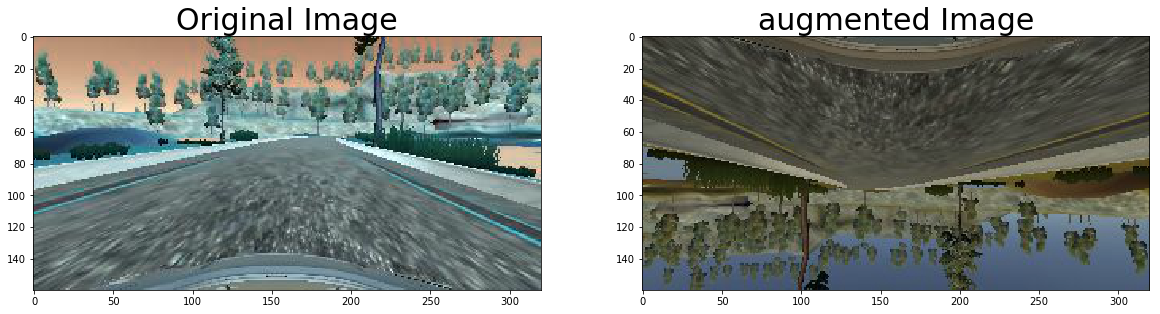

In [147]:
def random_augment(image , angle):
    
    augmented_image = np.copy(image)
    augmented_angle = angle
    
    augmented_image , augmented_angle = cvt_BGR2RGB(augmented_image , augmented_angle)
    augmented_image , augmented_angle = random_flip_vertical(augmented_image , augmented_angle)
    augmented_image , augmented_angle = random_flip_horizontal(augmented_image , augmented_angle)
    augmented_image = random_brightness(augmented_image)
    
    return augmented_image, augmented_angle

## test
test_image = X_train[1000]
steer = -1
augmented_image , augmented_angle = random_augment(test_image , angle)

# Visualize undistortion
print('angle = '+str(angle)+"     augmented_angle = "+str(augmented_angle))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(augmented_image)
ax2.set_title('augmented Image', fontsize=30)

angle = -1     augmented_angle = 1.0


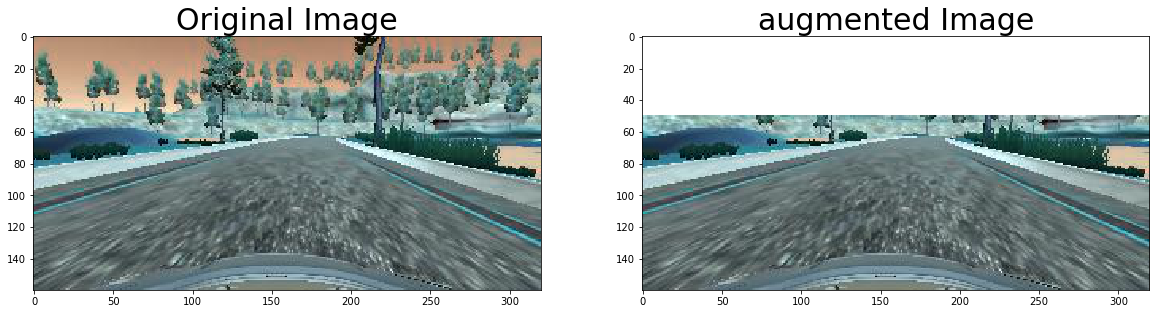

In [166]:
# def crop_resize(image):
#     cropped = cv2.resize(image[50:140,:], (320,160))
#     return cropped

### fill cropped region with dark
def random_delete_upper(image):
        
    import random

    prob_thresh = 0.5
    prob = random.random()

    if prob > prob_thresh :
        aug_img = np.copy(image)
        aug_img[0:50,:] = 255
        return aug_img        
    else :
        return image

## test
test_image = X_train[1000]
steer = -1
augmented_image = random_delete_upper(test_image)

# Visualize undistortion
print('angle = '+str(angle)+"     augmented_angle = "+str(augmented_angle))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(augmented_image)
ax2.set_title('augmented Image', fontsize=30)